<a href="https://colab.research.google.com/github/aiswaryal/Amazon-Predict-the-Sentiments/blob/main/Amazon_Sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np

In [8]:
df = pd.read_csv('Reviews.csv',quoting =3,error_bad_lines=False)
df.head()

b'Skipping line 4: expected 10 fields, saw 14\nSkipping line 6: expected 10 fields, saw 11\nSkipping line 7: expected 10 fields, saw 18\nSkipping line 8: expected 10 fields, saw 12\nSkipping line 9: expected 10 fields, saw 11\nSkipping line 12: expected 10 fields, saw 17\nSkipping line 13: expected 10 fields, saw 12\nSkipping line 14: expected 10 fields, saw 11\nSkipping line 17: expected 10 fields, saw 11\nSkipping line 20: expected 10 fields, saw 21\nSkipping line 22: expected 10 fields, saw 11\nSkipping line 23: expected 10 fields, saw 14\nSkipping line 26: expected 10 fields, saw 13\nSkipping line 27: expected 10 fields, saw 12\nSkipping line 28: expected 10 fields, saw 11\nSkipping line 30: expected 10 fields, saw 12\nSkipping line 31: expected 10 fields, saw 17\nSkipping line 32: expected 10 fields, saw 12\nSkipping line 33: expected 10 fields, saw 11\nSkipping line 34: expected 10 fields, saw 19\nSkipping line 35: expected 10 fields, saw 12\nSkipping line 36: expected 10 fields,

Id  ...                                               Text
0   1  ...  I have bought several of the Vitality canned d...
1   2  ...  "Product arrived labeled as Jumbo Salted Peanu...
2   4  ...  If you are looking for the secret ingredient i...
3   9  ...  Right now I'm mostly just sprouting this so my...
4  10  ...  This is a very healthy dog food. Good for thei...

[5 rows x 10 columns]

In [9]:
#reading dataset
df = pd.read_csv('Reviews.csv', quoting=3, error_bad_lines=False)
df.head()

b'Skipping line 4: expected 10 fields, saw 14\nSkipping line 6: expected 10 fields, saw 11\nSkipping line 7: expected 10 fields, saw 18\nSkipping line 8: expected 10 fields, saw 12\nSkipping line 9: expected 10 fields, saw 11\nSkipping line 12: expected 10 fields, saw 17\nSkipping line 13: expected 10 fields, saw 12\nSkipping line 14: expected 10 fields, saw 11\nSkipping line 17: expected 10 fields, saw 11\nSkipping line 20: expected 10 fields, saw 21\nSkipping line 22: expected 10 fields, saw 11\nSkipping line 23: expected 10 fields, saw 14\nSkipping line 26: expected 10 fields, saw 13\nSkipping line 27: expected 10 fields, saw 12\nSkipping line 28: expected 10 fields, saw 11\nSkipping line 30: expected 10 fields, saw 12\nSkipping line 31: expected 10 fields, saw 17\nSkipping line 32: expected 10 fields, saw 12\nSkipping line 33: expected 10 fields, saw 11\nSkipping line 34: expected 10 fields, saw 19\nSkipping line 35: expected 10 fields, saw 12\nSkipping line 36: expected 10 fields,

Id  ...                                               Text
0   1  ...  I have bought several of the Vitality canned d...
1   2  ...  "Product arrived labeled as Jumbo Salted Peanu...
2   4  ...  If you are looking for the secret ingredient i...
3   9  ...  Right now I'm mostly just sprouting this so my...
4  10  ...  This is a very healthy dog food. Good for thei...

[5 rows x 10 columns]

In [238]:
df['Text'].isnull().sum()


0

In [145]:
df = df.dropna()


Data Preprocessing

In [146]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text',
       'Helpful%', '%upvote'],
      dtype='object')

In [147]:

df['Helpful%'] = np.where(df['HelpfulnessDenominator']>0, df['HelpfulnessNumerator']/df['HelpfulnessDenominator'], -1)
df.head(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Id   ProductId  ... Helpful%  %upvote
0   1  B001E4KFG0  ...      1.0  80-100%
2   4  B000UA0QIQ  ...      1.0  80-100%

[2 rows x 12 columns]

In [148]:
df['Helpful%'].unique()

array([1.        , 0.8       , 0.        , 0.25      , 0.83333333,
       0.66666667, 0.33333333, 0.5       , 0.875     , 0.26315789,
       0.53846154, 0.6       , 0.75      , 0.2       , 0.125     ,
       0.57142857, 0.85714286, 0.9       , 0.91666667, 0.84615385,
       0.3       , 0.88888889, 0.78571429, 0.625     , 0.94117647,
       0.92307692, 0.16666667, 0.71428571, 0.14285714, 0.81818182,
       0.09090909, 0.96969697, 0.18181818, 0.28571429, 0.80645161,
       0.4375    , 0.47058824, 0.7       , 0.72727273, 0.27272727,
       0.26666667, 0.4       , 0.42857143, 0.36363636, 0.9137931 ,
       0.82857143, 0.90909091, 0.96428571, 0.11111111, 0.86666667,
       0.24      , 0.95238095, 0.09375   , 0.68      , 0.08333333,
       0.12121212, 0.92156863, 0.94736842, 0.77777778, 0.88235294,
       0.05555556, 0.06666667, 0.07407407, 0.375     , 0.55555556,
       0.89655172, 0.04545455, 0.93650794, 0.65957447, 0.23529412,
       0.34693878, 0.30263158, 0.16176471, 0.69230769, 0.80952

In [149]:
df['%upvote'] = pd.cut(df['Helpful%'], bins = [-1, 0, 0.2, 0.4, 0.6, 0.8, 1], labels = ['Empty', '0-20%', '20-40%', '40-60%', '60-80%', '80-100%'])
df.head(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Id   ProductId  ... Helpful%  %upvote
0   1  B001E4KFG0  ...      1.0  80-100%
2   4  B000UA0QIQ  ...      1.0  80-100%

[2 rows x 12 columns]

Exploratory Data Analysis

In [150]:
df.groupby(['Score', '%upvote']).agg('count')

Id  ProductId  UserId  ...  Summary  Text  Helpful%
Score %upvote                           ...                         
1     Empty     222        222     222  ...      222   222       222
      0-20%      68         68      68  ...       68    68        68
      20-40%    128        128     128  ...      128   128       128
      40-60%    178        178     178  ...      178   178       178
      60-80%    137        137     137  ...      137   137       137
      80-100%   289        289     289  ...      289   289       289
2     Empty      97         97      97  ...       97    97        97
      0-20%      19         19      19  ...       19    19        19
      20-40%     29         29      29  ...       29    29        29
      40-60%     45         45      45  ...       45    45        45
      60-80%     21         21      21  ...       21    21        21
      80-100%   140        140     140  ...      140   140       140
3     Empty     111        111     111  ...      111   111       111
      0-20%      18         18      18  ...       18    18        18
      20-40%     35         35      35  ...       35    35        35
      40-60%     37         37      37  ...       37    37        37
      60-80%     51         51      51  ...       51    51        51
      80-100%   172        172     172  ...      172   172       172
4     Empty     115        115     115  ...      115   115       115
      0-20%       4          4       4  ...        4     4         4
      20-40%     18         18      18  ...       18    18        18
      40-60%     56         56      56  ...       56    56        56
      60-80%     43         43      43  ...       43    43        43
      80-100%   467        467     467  ...      467   467       467
5     Empty     340        340     340  ...      340   340       340
      0-20%      13         13      13  ...       13    13        13
      20-40%     59         59      59  ...       59    59        59
      40-60%    303        303     303  ...      303   303       303
      60-80%    270        270     270  ...      270   270       270
      80-100%  3357       3357    3357  ...     3357  3357      3357

[30 rows x 10 columns]

Considering only Id Column, as I have to count Total Upvotes for different different categories

In [151]:
df.groupby(['Score', '%upvote']).agg({'Id':'count'})

Id
Score %upvote      
1     Empty     222
      0-20%      68
      20-40%    128
      40-60%    178
      60-80%    137
      80-100%   289
2     Empty      97
      0-20%      19
      20-40%     29
      40-60%     45
      60-80%     21
      80-100%   140
3     Empty     111
      0-20%      18
      20-40%     35
      40-60%     37
      60-80%     51
      80-100%   172
4     Empty     115
      0-20%       4
      20-40%     18
      40-60%     56
      60-80%     43
      80-100%   467
5     Empty     340
      0-20%      13
      20-40%     59
      40-60%    303
      60-80%    270
      80-100%  3357

In [152]:
df1 = df.groupby(['Score', '%upvote']).agg({'Id':'count'}).reset_index()
df1

Score  %upvote    Id
0       1    Empty   222
1       1    0-20%    68
2       1   20-40%   128
3       1   40-60%   178
4       1   60-80%   137
5       1  80-100%   289
6       2    Empty    97
7       2    0-20%    19
8       2   20-40%    29
9       2   40-60%    45
10      2   60-80%    21
11      2  80-100%   140
12      3    Empty   111
13      3    0-20%    18
14      3   20-40%    35
15      3   40-60%    37
16      3   60-80%    51
17      3  80-100%   172
18      4    Empty   115
19      4    0-20%     4
20      4   20-40%    18
21      4   40-60%    56
22      4   60-80%    43
23      4  80-100%   467
24      5    Empty   340
25      5    0-20%    13
26      5   20-40%    59
27      5   40-60%   303
28      5   60-80%   270
29      5  80-100%  3357

 Create Pivot Table for better conclusion

In [153]:
pivot = df1.pivot(index = '%upvote', columns = 'Score')
pivot

Id                     
Score      1    2    3    4     5
%upvote                          
Empty    222   97  111  115   340
0-20%     68   19   18    4    13
20-40%   128   29   35   18    59
40-60%   178   45   37   56   303
60-80%   137   21   51   43   270
80-100%  289  140  172  467  3357

In [154]:
import seaborn as sns


Creating heatmap for better visualization

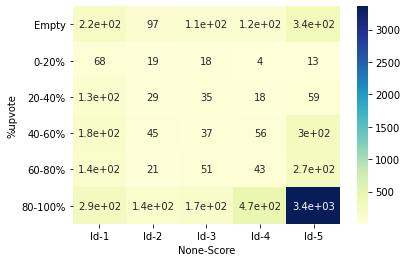

In [155]:
sns.heatmap(pivot, annot = True , cmap='YlGnBu')
#Reviews are skewed towards positive comments and majority of them are empty as well
#Dark color tells us that many people have given 5 as review

In [156]:
df['Score'].unique()

array([5, 2, 4, 3, 1])

Removing 3 as it here represents neutral

In [157]:
df2 = df[df['Score'] != 3]
df2.head(2)

Id   ProductId  ... Helpful%  %upvote
0   1  B001E4KFG0  ...      1.0  80-100%
2   4  B000UA0QIQ  ...      1.0  80-100%

[2 rows x 12 columns]

Applying Bag of Words

In [158]:
#Independent Variable
X = df2['Text']

In [159]:
df2['Score'].unique()

array([5, 2, 4, 1])

Mapping scores with 0 and 1 to convert it into classification problem

In [160]:
y_dict = {1:0, 2:0, 4:1, 5:1}

In [161]:
y = df2['Score'].map(y_dict)

In [162]:
#for converting text into vector using nlp
from sklearn.feature_extraction.text import CountVectorizer


In [163]:
cv = CountVectorizer(stop_words= 'english')

Filling data

In [164]:
X_c =cv.fit_transform(X)

Number of entries/Number of features

In [165]:
X_c.shape[1]

10687

In [166]:
X_c.shape

(6418, 10687)

Checking model accuracy

In [167]:
from sklearn.model_selection import train_test_split


In [168]:
X_train, X_test, y_train, y_test = train_test_split(X_c, y)
# 75% od data selected for training purpose

In [169]:
X_train.shape

(4813, 10687)

In [170]:
from sklearn.linear_model import LogisticRegression


In [171]:
log = LogisticRegression()

Fitting training data

In [172]:
ml = log.fit(X_train, y_train)

Model accuracy

In [173]:
ml.score(X_test, y_test)

0.9015576323987539

In [174]:
w = cv.get_feature_names()
w

['00',
 '00pm',
 '01',
 '02',
 '03',
 '03510',
 '04',
 '06',
 '07',
 '08',
 '09',
 '10',
 '100',
 '1000',
 '1000mg',
 '100th',
 '108',
 '10lb',
 '10oz',
 '10th',
 '11',
 '110',
 '11am',
 '11g',
 '11in',
 '12',
 '120',
 '121',
 '128',
 '12g',
 '12oz',
 '13',
 '130',
 '1300',
 '135',
 '136',
 '1395',
 '13oz',
 '14',
 '140',
 '143',
 '144',
 '149',
 '14g',
 '14oz',
 '15',
 '150',
 '1500',
 '150cal',
 '15th',
 '16',
 '160',
 '160lb',
 '16oz',
 '16th',
 '17',
 '1739',
 '175',
 '17th',
 '18',
 '180',
 '1845979125',
 '18_',
 '18m',
 '18th',
 '19',
 '190',
 '1950',
 '1961',
 '1970s',
 '1978',
 '1990s',
 '19th',
 '1c',
 '1g',
 '1l',
 '1lb',
 '1ounce',
 '1oz',
 '1st',
 '1x',
 '20',
 '200',
 '2001',
 '2003',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '20oz',
 '20th',
 '21',
 '210',
 '2100',
 '21st',
 '22',
 '23',
 '2338',
 '24',
 '240',
 '240g',
 '24oz',
 '24pk',
 '25',
 '250',
 '2500',
 '25gal',
 '25th',
 '26',
 '27',
 '28',
 '280',
 '28g',
 '29',
 '2c',
 '

In [175]:
coef = ml.coef_.tolist()[0]
coef

[-0.10059815350494607,
 0.0016474238877398357,
 -0.3086691160117339,
 -0.2921944168851964,
 0.0,
 0.010972079801360264,
 0.0,
 0.0,
 -0.15095610904823858,
 0.0,
 0.0,
 -0.5053922264988652,
 -0.6701450167184981,
 -0.01296509113884612,
 0.012537950829161131,
 0.0022666136589229954,
 0.0,
 0.01295208068255804,
 8.47949884623756e-05,
 -0.08956248499619378,
 0.0008132567922865518,
 0.1975059789023349,
 0.005865675785140485,
 -0.07465848979285689,
 0.031868333395082105,
 -0.005449604950591412,
 0.02418569760613536,
 -0.31762482789022506,
 -0.0846361093613846,
 0.0,
 0.04388518531298744,
 0.10058330590742885,
 -0.23596925105595337,
 0.0,
 0.0,
 0.0,
 0.05734831364702297,
 0.00281120721948576,
 -0.1429750419434729,
 0.029167037474146763,
 0.0,
 -0.01370293980713069,
 -0.21445052627913835,
 0.0048518798844439295,
 0.06831879035308748,
 -0.1827004808313211,
 -0.33979322552314867,
 0.0056115333141003865,
 0.014449415701772637,
 0.0,
 0.16372341086141448,
 -0.1501963130236714,
 -0.1955204046068510

Converting into a dataframe that has word and coefficient

In [176]:
coef_df = pd.DataFrame({'Word':w, 'Coefficient':coef})
coef_df

Word  Coefficient
0            00    -0.100598
1          00pm     0.001647
2            01    -0.308669
3            02    -0.292194
4            03     0.000000
...         ...          ...
10682       zon     0.000000
10683   zoology    -0.007714
10684  zucchini     0.003479
10685      zuke     0.293729
10686      zyto     0.064563

[10687 rows x 2 columns]

Sorting on the basis of coefficients and then words


In [177]:
coef_df = coef_df.sort_values(['Coefficient','Word'], ascending= False)

Getting top 20 positive words

In [178]:
coef_df.head(20)

Word  Coefficient
1052        best     2.008891
4253       great     1.835111
5613       loves     1.783420
3445   excellent     1.618634
10497  wonderful     1.614566
5608        love     1.559194
5609       loved     1.463341
4101        glad     1.449626
2691   delicious     1.434053
3435     exactly     1.415584
3621    favorite     1.352318
805      awesome     1.348634
3204        easy     1.325631
6875     perfect     1.323015
6295        nice     1.300904
3327       enjoy     1.279375
10658      yummy     1.244941
4606        home     1.152044
3604        fast     1.106309
5471       liked     1.089716

Getting top 20 negative words

In [179]:
coef_df.tail(20)

Word  Coefficient
7447     purchasing    -1.253924
1724        changed    -1.258311
3227         edible    -1.259618
4642       horrible    -1.272043
1131          bland    -1.273481
5828          maybe    -1.279132
10191      vinegary    -1.289339
7914         return    -1.298991
1805        chewing    -1.355235
9624        thought    -1.363594
4899     ingredient    -1.375680
437             air    -1.385906
1841          china    -1.408982
6212          nasty    -1.473183
10538         worst    -1.540626
9632          threw    -1.558761
10308         waste    -1.600549
10337          weak    -1.796375
2906   disappointed    -1.838922
9533       terrible    -2.134502

Automating everything that I have done so far i.e. 1)Applying BOW 2)Checking Model Accuracy 3)Fetching tope 20 positive words and top 20 negative words

In [180]:
def text_fit(X, y, nlp_model,ml_model,coef_show=1):
    
    X_c = nlp_model.fit_transform(X)
    print('features: {}'.format(X_c.shape[1]))
    X_train, X_test, y_train, y_test = train_test_split(X_c, y)
    print(' train records: {}'.format(X_train.shape[0]))
    print(' test records: {}'.format(X_test.shape[0]))
    ml =ml_model.fit(X_train, y_train)
    acc = ml.score(X_test, y_test)
    print ('Model Accuracy: {}'.format(acc))
    
    if coef_show == 1: 
        w = nlp_model.get_feature_names()
        coef = ml.coef_.tolist()[0]
        coeff_df = pd.DataFrame({'Word' : w, 'Coefficient' : coef})
        coeff_df = coeff_df.sort_values(['Coefficient', 'Word'], ascending=[0, 1])
        print('\n')
        print('-Top 20 positive-')
        print(coeff_df.head(20).to_string(index=False))
        print('\n')
        print('-Top 20 negative-')        
        print(coeff_df.tail(20).to_string(index=False))
    




In [181]:
from sklearn.feature_extraction.text import CountVectorizer

In [182]:
cv = CountVectorizer(stop_words='english')

In [183]:
from sklearn.linear_model import LogisticRegression

Calling the function we created to automate everything

In [184]:
text_fit(X, y, cv, LogisticRegression())

features: 10687
 train records: 4813
 test records: 1605
Model Accuracy: 0.907165109034268


-Top 20 positive-
      Word  Coefficient
      best     2.113301
     great     1.931540
   perfect     1.835520
 wonderful     1.737277
      nice     1.679531
      love     1.663435
     loves     1.646680
 excellent     1.570743
     loved     1.558276
      glad     1.525162
      easy     1.500216
  favorite     1.412748
   awesome     1.399716
 delicious     1.326887
   exactly     1.270683
      fast     1.258950
   pleased     1.245389
    stores     1.226998
      home     1.216579
      good     1.215217


-Top 20 negative-
         Word  Coefficient
        stale    -1.200520
       return    -1.205229
       unless    -1.215866
       edible    -1.224594
     vinegary    -1.250130
      smelled    -1.257101
   purchasing    -1.268173
        nasty    -1.276567
        maybe    -1.294252
         paid    -1.318142
     horrible    -1.375933
        worst    -1.388487
   ingredient 

Defining a predict function

In [185]:

from sklearn.metrics import confusion_matrix,accuracy_score
def predict(X, y, nlp_model,ml_model):
    
    X_c = nlp_model.fit_transform(X)
    print('features: {}'.format(X_c.shape[1]))
    X_train, X_test, y_train, y_test = train_test_split(X_c, y)
    print(' train records: {}'.format(X_train.shape[0]))
    print(' test records: {}'.format(X_test.shape[0]))
    ml =ml_model.fit(X_train, y_train)
    predictions=ml.predict(X_test)
    cm=confusion_matrix(predictions,y_test)
    print(cm)
    acc=accuracy_score(predictions,y_test)
    print(acc)

In [186]:
from sklearn.feature_extraction.text import CountVectorizer
c = CountVectorizer(stop_words = 'english')
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [187]:
predict(X,y,c,lr)

features: 10687
 train records: 4813
 test records: 1605
[[ 232   51]
 [ 112 1210]]
0.8984423676012461


In [188]:
from sklearn.dummy import DummyClassifier

In [189]:
c = CountVectorizer()

In [190]:
text_fit(X, y, c, DummyClassifier(),0)

features: 10971
 train records: 4813
 test records: 1605
Model Accuracy: 0.6691588785046729


/usr/local/lib/python3.7/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


In [191]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [192]:
lr = LogisticRegression()

In [193]:
tfidf = TfidfVectorizer(stop_words='english')

In [194]:
text_fit(X,y,tfidf,lr,0)

features: 10687
 train records: 4813
 test records: 1605
Model Accuracy: 0.8691588785046729


In [195]:
predict(X,y, tfidf,lr)

features: 10687
 train records: 4813
 test records: 1605
[[ 117    7]
 [ 224 1257]]
0.8560747663551402


Data Prepration for predicting the upvotes

In [196]:
df.head()

Id   ProductId  ... Helpful%  %upvote
0   1  B001E4KFG0  ...      1.0  80-100%
2   4  B000UA0QIQ  ...      1.0  80-100%
3   9  B000E7L2R4  ...      1.0  80-100%
5  14  B001GVISJM  ...      1.0  80-100%
6  15  B001GVISJM  ...      0.8   60-80%

[5 rows x 12 columns]

In [197]:
data = df[df['Score'] ==5]
data.head()

Id   ProductId  ... Helpful%  %upvote
0    1  B001E4KFG0  ...      1.0  80-100%
3    9  B000E7L2R4  ...      1.0  80-100%
6   15  B001GVISJM  ...      0.8   60-80%
18  57  B004N5KULM  ...      1.0  80-100%
20  65  B005DUM9UQ  ...      1.0  80-100%

[5 rows x 12 columns]

In [198]:
data['%upvote'].unique()

['80-100%', '60-80%', 'Empty', '40-60%', '0-20%', '20-40%']
Categories (6, object): ['Empty' < '0-20%' < '20-40%' < '40-60%' < '60-80%' < '80-100%']

Removing 40-60% as it represents neutral value

In [199]:
data2 = data[data['%upvote'].isin(['80-100%', '60-80%', '20-40%', '0-20%'])]
data2.head(2)

Id   ProductId  ... Helpful%  %upvote
0   1  B001E4KFG0  ...      1.0  80-100%
3   9  B000E7L2R4  ...      1.0  80-100%

[2 rows x 12 columns]

In [200]:
X= data2['Text']

In [201]:
data2['%upvote'].unique()

['80-100%', '60-80%', '0-20%', '20-40%']
Categories (4, object): ['0-20%' < '20-40%' < '60-80%' < '80-100%']

In [239]:
y_dict = {'80-100%':1, '60-80%':1, '20-40%':0,'0-20%':0}
y = data2['%upvote'].map(y_dict)

In [240]:
y.value_counts()

1.0    3627
0.0      72
Name: %upvote, dtype: int64

Applying TF-IDF

In [241]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [242]:
tfidf = TfidfVectorizer()

In [243]:
X_c = tfidf.fit_transform(X)

Appplying techniques of handling imbalance data if data is imbalanced

Checking is the data is imbalanced

In [244]:
y.value_counts()
#data is imbalanced as the count of one category is way higher than the other 
#ml gets biased towards the category with higher count

1.0    3627
0.0      72
Name: %upvote, dtype: int64

In [245]:
from imblearn.over_sampling import RandomOverSampler

In [246]:
os = RandomOverSampler()

In [249]:
X_train_res, y_train_res = os.fit_sample(X_c,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [250]:
X_train_res.shape


(7254, 8046)

In [251]:
y_train_res.shape

(7254,)

In [252]:
from collections import Counter

In [253]:
print('Original Dataset Shape : {}'.format(Counter(y)))
print('Resampled Dataset Shape : {}'.format(Counter(y_train_res)))


Original Dataset Shape : Counter({1.0: 3627, 0.0: 72})
Resampled Dataset Shape : Counter({1.0: 3627, 0.0: 3627})


Do cross validation using GridSearchCV and then do predictions

In [254]:
from sklearn.linear_model import LogisticRegression

In [255]:
log_class = LogisticRegression()

In [256]:
np.arange(-2,3)

array([-2, -1,  0,  1,  2])

In [257]:
grid = {'C':10.0**np.arange(-2,3),'penalty':['l1','l2']}

In [258]:
from sklearn.model_selection import GridSearchCV

In [259]:
clf = GridSearchCV(estimator=log_class, param_grid= grid, cv = 5,n_jobs = -1,scoring = 'f1_macro')

In [260]:
clf.fit(X_train_res,y_train_res)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1_macro', verbose=0)

In [261]:
from sklearn.model_selection import train_test_split

In [262]:
X_train,X_test,y_train,y_test = train_test_split(X_c,y)

In [263]:
pred = clf.predict(X_test)

In [264]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [265]:
confusion_matrix(y_test, pred)

array([[ 19,   0],
       [  0, 906]])

In [266]:
accuracy_score(y_test,pred)

1.0